## Proyecto 1 - Relación Minutos - Ingreso

### Integrantes:



### Exploración descriptiva de datos

* Descripción de las variables
* Tratamiento de valores nulos
* Algunos gráficos de relación entre minutos e ingreso de clientes

**¿Existe relación entre el total de minutos usados con la compañía y el ingreso total de los clientes?**

In [1]:
# importar las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
# cargar los datos

df = pd.read_csv('./data_raw/Credito_dias.csv')

df.head()

,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,Y,371,1082423
1,13552.0,1172.25,N,83,1069232
2,4152.0,577.39,Y,675,1031705
3,1863.0,294.26,Y,218,1089806
4,4155.0,433.16,N,222,1076695


**Diccionario:**

`totrev`: Ingresos del cliente.

`totmou`: Total de minutos usados por el cliente.

`creditcd`: Indicador de tarjeta de crédito.

`eqpdays`: Número de días (antigüedad) del equipo actual.

In [3]:
# revisar los tipos de datos

print(df.dtypes)

totmou         float64
totrev         float64
creditcd        object
eqpdays          int64
Customer_ID      int64
dtype: object


**Tipos de datos**

Encontramos en el set de datos dos variables float64, una variable object y dos variables int64.

Las variables `totmou` y `totrev` tipo `float64` contienen datos de tipo numéricas continuas, tienen el tipo de dato adecuado.

La variable `creditcd` tipo `object` contiene datos de tipo nominal, tiene el tipo de dato adecuado.

Las variables `eqdays` y `Customer_ID` tipo int64 contienen datos de tipo entero y nominal categórico respectivamente. Para la variable `Customer_ID` haremos cambio de tipo de dato a categórico.

In [4]:
# convertir `Customer_ID` a `category`

df['Customer_ID'] = df['Customer_ID'].astype('category')

In [5]:
# revisar el tamaño del dataset

print(f'Cantidad de filas y columnas: {df.shape}')

Cantidad de filas y columnas: (10000, 5)


**Tamaño del dataset**

El dataset contiene 10.000 filas y 5 columnas. Deben revisarse la calidad de los datos para quedar finalmente con los datos que usaremos para el análisis. 

In [6]:
# revisar los valores nulos

print(f'Suma de valores nulos por variable: \n{df.isnull().sum()}')

Suma de valores nulos por variable: 
totmou           0
totrev           0
creditcd       152
eqpdays          0
Customer_ID      0
dtype: int64


In [7]:
# porcentaje de valores nulos por variable

print(f'Porcentaje de valores nulos por variable: \n{df.isnull().mean()*100}')

Porcentaje de valores nulos por variable: 
totmou         0.00
totrev         0.00
creditcd       1.52
eqpdays        0.00
Customer_ID    0.00
dtype: float64


**Datos nulos**

Se observa un 1.5% de datos nulos en la variable `creditcd`. Entendiendo el caso de estudio se puede despreciar esta cantidad de registros que contiene datos nulos ya que no afectará el que haya correlación o no entre las variables en estudio.

In [8]:
# eliminar valores nulos

df = df.dropna()

In [9]:
# estadística descripitiva

print(f'Estadística descriptiva: \n{df.describe()}')

Estadística descriptiva: 
              totmou        totrev      eqpdays
count    9848.000000   9848.000000  9848.000000
mean     7697.900458   1042.302115   386.982433
std      8662.012934    857.945971   252.473800
min         0.000000     11.100000    -5.000000
25%      2575.000000    526.627500   210.000000
50%      5261.500000    820.955000   338.000000
75%      9842.000000   1272.975000   523.000000
max    163264.176700  13426.600000  1823.000000


In [10]:
# correlación entre las variables de interés

correlation = df[['totmou', 'totrev']].corr()
print(f'Correlación entre las variables de interés: \n{correlation}')

Correlación entre las variables de interés: 
          totmou    totrev
totmou  1.000000  0.835279
totrev  0.835279  1.000000


**Análisis Descriptivo**

Las variables numéricas tienen las siguientes características relevantes:

* `totmou`: Los minutos usados por el cliente tienen una media de 7.697 y una desviación estadar de 8.662. La desviación estandar muestra una dispersión de los datos muy alta respecto la media, este dato puede estar influenciado por datos atípicos muy pequeños o muy altos. Debe analizarse este caso.

* `totrev`: Los ingresos del cliente tienen una media de 1.042 unidades monetarias y una desviación estandar de 857 unidades monetarias. Como la variable anterior, también se observa una dispersión alta de los datos respecto la media. Posiblemente también se encuentra influenciado por datos atípicos muy pequeños o muy altos. Debe analizarse este caso.

* **Correlación**: La correlación entre las variables de interés es de 83.5%, una correlación alta y positiva: A mayor ingreso del cliente mayor cantidad de minutos usados por el cliente.

In [11]:
# función para encontrar los outliers

def find_outliers(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]
    return outliers

In [12]:
# encontrar los outliers en totrev

outliers_totrev = find_outliers(df, 'totrev')

print(f'Outiliers en la variable `totrev`: \n{outliers_totrev}')

Outiliers en la variable `totrev`: 
           totmou   totrev creditcd  eqpdays Customer_ID
34    36302.00000  5020.37        Y      257     1008208
38    59449.00000  3531.09        Y      380     1015658
42    21518.05000  2769.67        Y      657     1001867
49    21991.00000  2809.08        Y      241     1005704
117   32828.00000  2712.13        N      184     1011205
...           ...      ...      ...      ...         ...
9906  41453.00000  4651.43        Y      509     1004580
9934  26534.13333  3396.97        Y     1628     1000346
9937  12331.00000  2506.67        Y      216     1007924
9979  23083.00000  2419.69        Y       80     1056910
9991  82843.00000  8927.15        N      182     1002540

[546 rows x 5 columns]


In [13]:
# encontrar los outliers en totmou

outliers_totmou = find_outliers(df, 'totmou')

print(f'Outiliers en la variable `totmou`: \n{outliers_totmou}')

Outiliers en la variable `totmou`: 
           totmou   totrev creditcd  eqpdays Customer_ID
18    24069.00000  2129.74        Y      199     1018015
34    36302.00000  5020.37        Y      257     1008208
38    59449.00000  3531.09        Y      380     1015658
42    21518.05000  2769.67        Y      657     1001867
49    21991.00000  2809.08        Y      241     1005704
...           ...      ...      ...      ...         ...
9919  26069.00000  1650.44        Y      601     1045567
9934  26534.13333  3396.97        Y     1628     1000346
9971  24124.00000  2288.89        Y      163     1000609
9979  23083.00000  2419.69        Y       80     1056910
9991  82843.00000  8927.15        N      182     1002540

[575 rows x 5 columns]


In [14]:
# crear un dataset con los outliers encontrados

outliers = pd.concat([outliers_totrev, outliers_totmou])

In [15]:
# analizar la correlación entre las variables de interes en los outliers

correlation = outliers[['totrev', 'totmou']].corr()

print(f'Correlación entre `totrev` y `totmou` en los outliers: \n{correlation}')

Correlación entre `totrev` y `totmou` en los outliers: 
          totrev    totmou
totrev  1.000000  0.698818
totmou  0.698818  1.000000


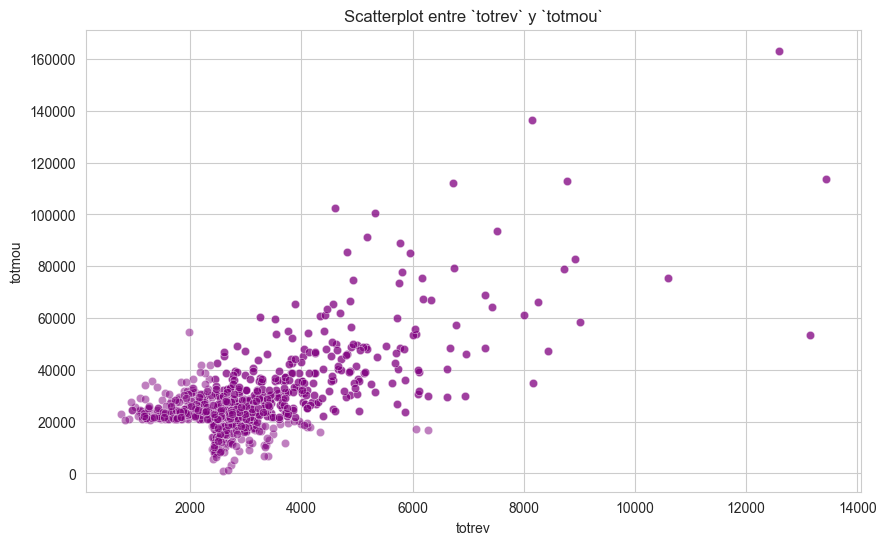

In [16]:
# graficar la las dos variables con scatterplot

plt.figure(figsize=(10, 6))
sns.scatterplot(data=outliers, x='totrev', y='totmou', alpha=0.5,color='purple')
plt.title('Scatterplot entre `totrev` y `totmou`')
plt.show()

In [17]:
# quitar los outliers del dataset

df_so = df.drop(outliers.index)

In [18]:
# estadística descriptiva sin outliers

print(f'Estadística descriptiva sin outliers: \n{df_so.describe()}')

Estadística descriptiva sin outliers: 
             totmou       totrev      eqpdays
count   9082.000000  9082.000000  9082.000000
mean    5944.784345   869.015612   391.186743
std     4553.512595   473.748339   250.464988
min        0.000000    11.100000    -5.000000
25%     2409.000000   505.490000   216.000000
50%     4804.500000   767.975000   341.000000
75%     8493.250000  1144.890000   526.000000
max    20677.000000  2382.830000  1823.000000


In [19]:
# analizar la correlación entre las variables de interes sin outliers

correlation = df_so[['totrev', 'totmou']].corr()

print(f'Correlación entre `totrev` y `totmou`: \n{correlation}')

Correlación entre `totrev` y `totmou`: 
          totrev    totmou
totrev  1.000000  0.693063
totmou  0.693063  1.000000


**Análisis de outliers**

Creando una función que usa el rango intercuartil IQR, el primer cuartil Q1 y tercer cuartil Q3 para limitar los datos muy pequeños o muy altos, podemos observar que los datos obtenidos como `Outliers` son al rededor de 1.200 y siguen presentando un patron de comportamiento causal, pero con el efecto de disminuir de 83% a 69% en la correlación, con la misma dirección positiva.

**Se puede concluir que los datos muy grandes, para este caso, hacen parte del comportamiento esperado y quitarlos solo genera disminuir el campo de estudio de las variables y reduce la explicabilidad de un modelo de regresión que se quiera ajustar.**

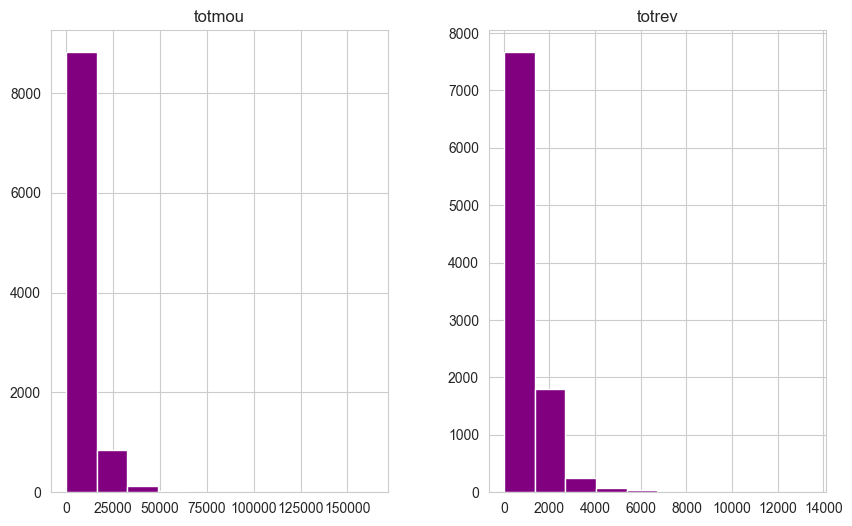

In [20]:
# histogramas de las variables de interés

df[['totmou','totrev']].hist(figsize=(10,6), color='purple')
plt.show()

**Análisis de distribución de los datos de las variables de interés**

Se observa una distribución de ambas variables con sesgo derecho, ya se habían descrito las medidas de tendencia central, de manera visual encontramos similitud en la distribución de ambas variables, con diferencia en la magnitud que representa cada dato.

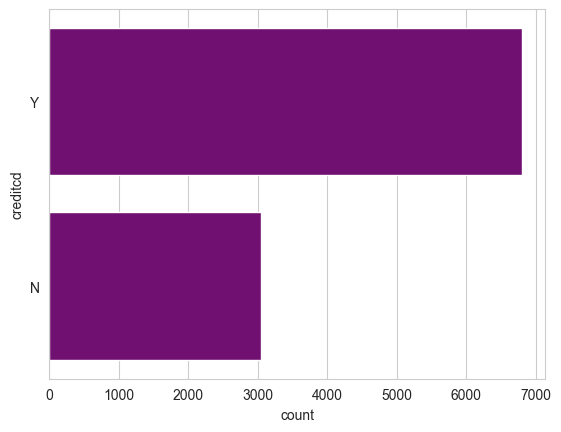

In [21]:
# gráficos de barras de las variables categóricas

for col in df.select_dtypes(include='object').columns:
    sns.countplot(y=col, data=df, color='purple')
    plt.show() 

**Análisis de distribución de las variables categóricas**

Se observa que la variable `creditcd` tiene dos características Y y N, indicando el registro de tarjeta de crédito que puede tener o no el cliente. Esta variable puede aportar otro análisis segmentado que puede aportar información adicional del comportamiento de los datos, sin embargo para este caso se realizará el análisis de las variables de interés independiente de la variable `creditcd`.

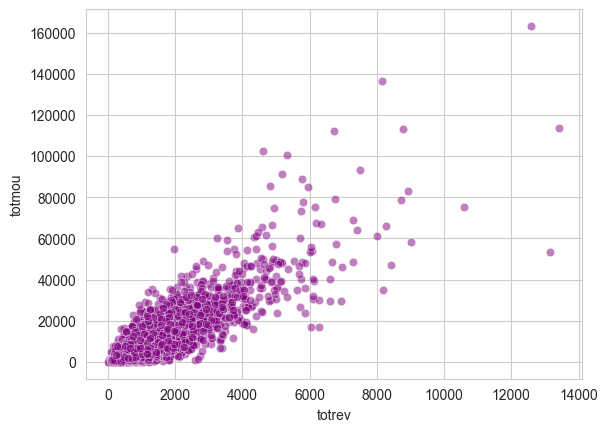

In [22]:
# graficar diagrama de dispersión de las variables `totrev` y `totmou`

sns.scatterplot(x='totrev', y='totmou', data=df, alpha=0.5, color='purple')
plt.show()

**Análisis de diagrama de dispersión**

Oservamos que existe relación entre el total de ingresos del cliente y la cantidad de minutos utilizados. Esta relación se observa directamente proporcional y positiva, con mayor dispersión de los puntos de datos de mayor magnitud.

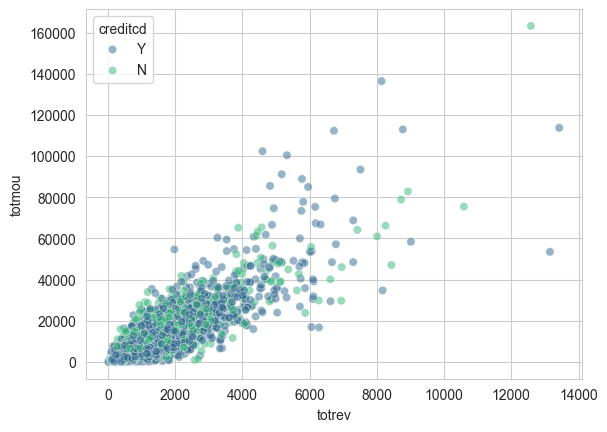

In [23]:
# graficar diagrama de dispersión de las variables `totrev` y `totmou` con `creditcd`

sns.scatterplot(x='totrev', y='totmou', data=df, alpha=0.5, hue='creditcd', 
                palette='viridis')
plt.show()

<Axes: xlabel='totrev', ylabel='totmou'>

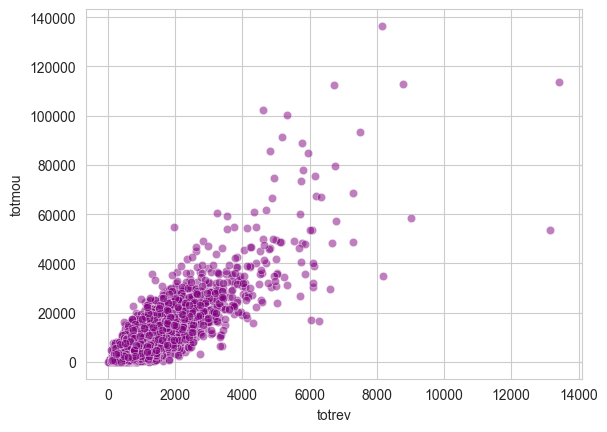

In [24]:
sns.scatterplot(data=df[df['creditcd'] == 'Y'], y='totmou', x='totrev', 
                alpha=0.5, color='purple')

In [25]:
df[df['creditcd'] == 'Y'][['totrev','totmou']].corr()

,totrev,totmou
totrev,1.000000,0.830014
totmou,0.830014,1.000000


<Axes: xlabel='totrev', ylabel='totmou'>

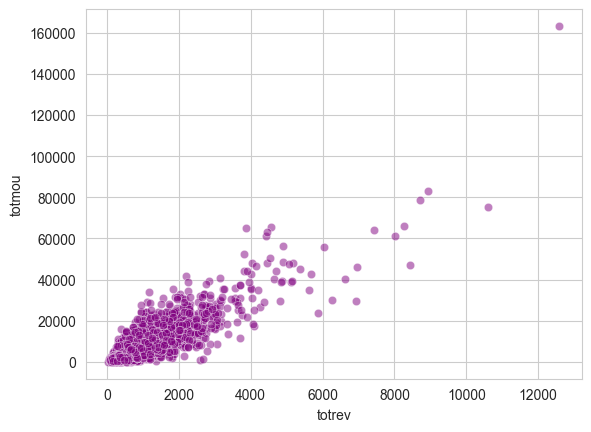

In [26]:
sns.scatterplot(data=df[df['creditcd'] == 'N'], y='totmou', x='totrev', alpha=0.5, color='purple')

In [27]:
df[df['creditcd'] == 'N'][['totrev','totmou']].corr()

,totrev,totmou
totrev,1.00000,0.85062
totmou,0.85062,1.00000
